## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [48]:
import pandas as pd

#Import Data and subset usefull attributes
office_df_raw = pd.read_csv("datasets/office_episodes.csv")
office_df = office_df_raw[["episode_number", "viewership_mil", "scaled_ratings", "has_guests"]]

office_df_guest = office_df[office_df["has_guests"] == True]
office_df_notguest = office_df[office_df["has_guests"] == False]

#Set the marker style, marker size and color for plotting
colors1 = []
for index, df in office_df_guest.iterrows() :
    if df["scaled_ratings"] >= 0.75:
        colors1.append('darkgreen')
    elif df["scaled_ratings"] >= 0.5:
        colors1.append('lightgreen')
    elif df["scaled_ratings"] >= 0.25:
        colors1.append('orange')
    else:
        colors1.append('red')
        
colors2 = []
for index, df in office_df_notguest.iterrows() :
    if df["scaled_ratings"] >= 0.75:
        colors2.append('darkgreen')
    elif df["scaled_ratings"] >= 0.5:
        colors2.append('lightgreen')
    elif df["scaled_ratings"] >= 0.25:
        colors2.append('orange')
    else:
        colors2.append('red')

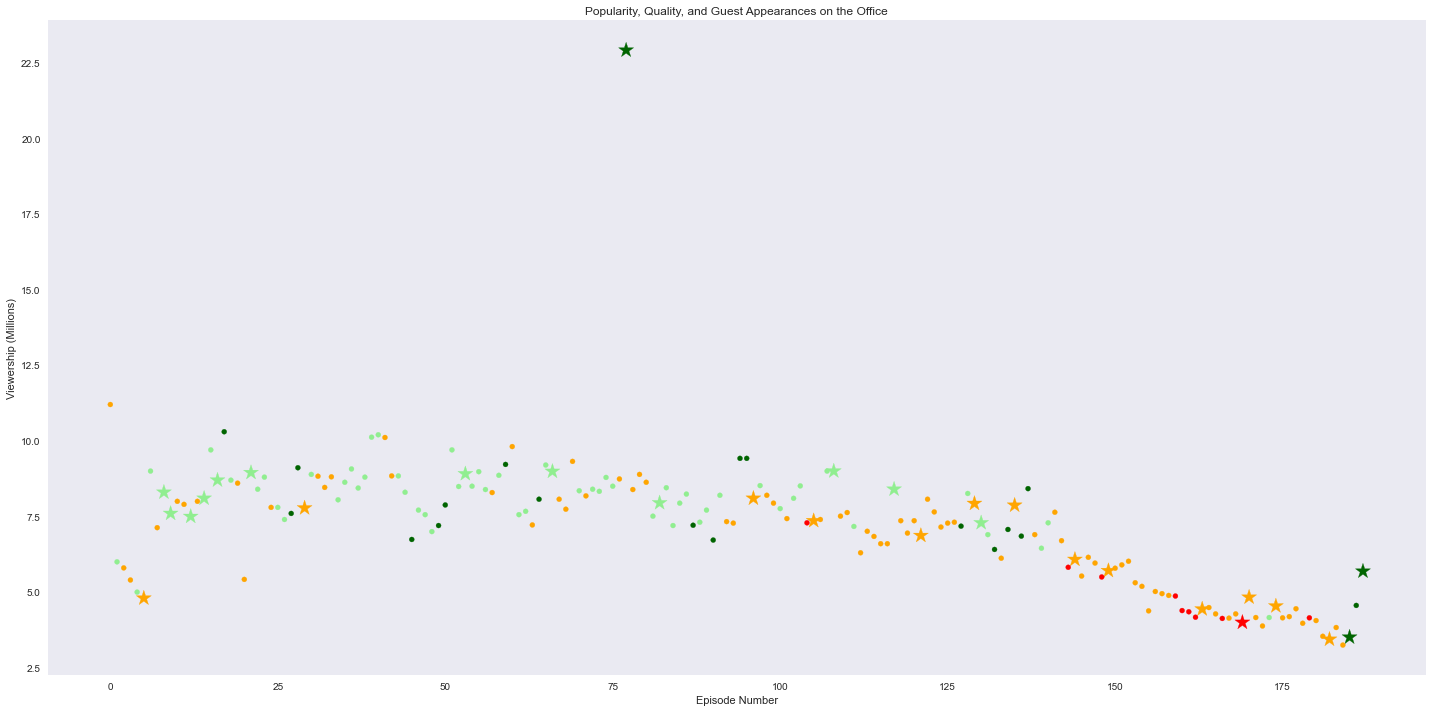

In [49]:
import matplotlib.pyplot as plt

#Set Figure Parameters
plt.style.use('seaborn')
fig = plt.figure(figsize = (20,10))

#Create graph using dataframe
plt.scatter(office_df_guest["episode_number"], office_df_guest["viewership_mil"], s = 250, marker = '*', color = colors1)
plt.scatter(office_df_notguest["episode_number"], office_df_notguest["viewership_mil"], s = 25, color = colors2)

#Add Legend, Labels, Title and Grid
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.grid()

In [59]:
#Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode.

print(office_df_raw[office_df_raw["has_guests"] == True][["viewership_mil", "guest_stars"]])


     viewership_mil                                        guest_stars
5              4.80                                          Amy Adams
8              8.30                                       Nancy Carell
9              7.60                                          Amy Adams
12             7.50                                        Tim Meadows
14             8.10                                          Ken Jeong
16             8.70                                         Rob Riggle
21             8.95                                      Conan O'Brien
29             7.78                                      Jerome Bettis
53             8.91                                       Kevin McHale
66             8.99                               Wendi McLendon-Covey
77            22.91          Cloris Leachman, Jack Black, Jessica Alba
82             7.95                                         Idris Elba
96             8.10                                         Mike Starr
105   